In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)
%matplotlib inline
# reload module each time cell is run
%load_ext autoreload
%autoreload 2

In [95]:
from Model import RetirementModelClass

C:\Users\Frederik\Desktop\speciale_retirement\kode\Speciale_retirement\Main\transitions.py:37: RuntimeWarning: divide by zero encountered in log
  lw = np.log(a)
C:\Users\Frederik\Desktop\speciale_retirement\kode\Speciale_retirement\Main\transitions.py:39: RuntimeWarning: invalid value encountered in multiply
  return frac*a


In [96]:
# a. setup (calling the __init__ method) 
model = RetirementModelClass(name='baseline',solmethod='egm')

# b. print
print(model)

# c. solve
model.solve()

# d. simulate
model.simulate()

Modelclass: RetirementModelClass
Parameters:
 T = 54
 Tr = 21
 rho = 0.96
 beta = 0.98
 alpha = 0.1
 gamma = 0.08
 sigma_eta = 0
 sigma_xi = 0.2
 R = 1.03
 a_max = 100
 a_phi = 1.1
 Nxi = 8
 Na = 150
 poc = 10
 grid_a = [array of doubles]
 xi = [array of doubles]
 tol = 1e-08
 do_print = True
 do_simple_w = False
 cppthreads = 1
 simT = 54
 simN = 1000
 sim_seed = 1998



In [97]:
import figs
from transitions import age

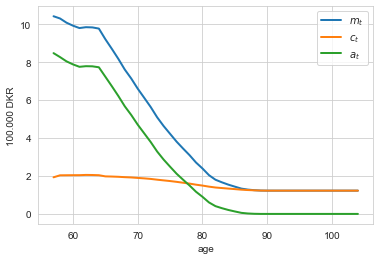

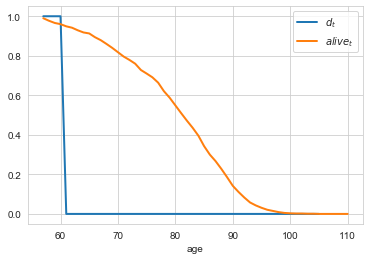

In [98]:
figs.lifecycle(model)
figs.lifecycle(model,['d','alive'])

In [100]:
import numpy as np
retired = np.zeros(12)
dead = np.zeros(12)
for i in range(1,len(rr)+1):
    retired[i-1] = np.sum(model.sim.d[i] - model.sim.d[i-1] == -1)
    dead[i-1] = np.count_nonzero(np.isnan(model.sim.d[i]))

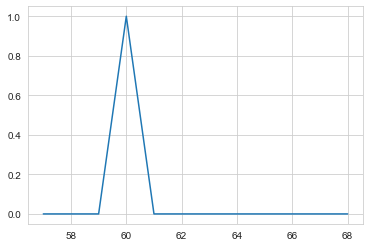

In [101]:
plt.plot(transitions.age(np.arange(12)), retired / (1000 - dead))

In [79]:
dead

array([ 10.,  23.,  34.,  40.,  51.,  58.,  71.,  82.,  87., 106., 121.,
       140.])

In [88]:
np.sum(retired / (1000 - dead))

0.9419233434984101

In [62]:
rr

array([0.003     , 0.01013171, 0.0466805 , 0.29845815, 0.30586371,
       0.37268519, 0.30188679, 0.19444444, 0.18439716, 0.20869565,
       0.25842697, 0.25757576])

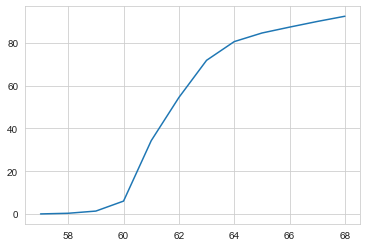

In [31]:
import matplotlib.pyplot as plt
plt.plot(transitions.age(np.arange(12)),rr)

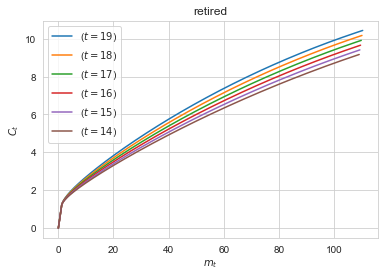

In [10]:
figs.cons_choice(model,[19,18,17,16,15,14],choice='retire')

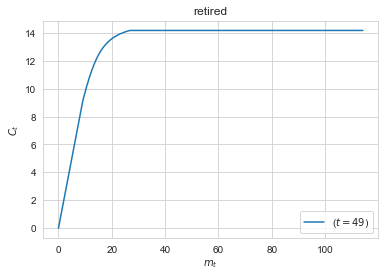

In [11]:
figs.cons_choice(model,[model.par.T-5],choice='retire')

In [83]:
#utility.inv_marg_func(model.sol.q[19],model.par)

In [84]:
#model.sol.c[15]

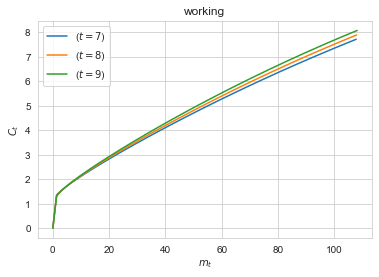

In [12]:
figs.cons_choice(model,[7,8,9],choice='work')